## KNN Classifier and Regressor

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, 
                          n_features=3, 
                          n_classes=2, 
                          n_redundant=1, 
                          random_state=999)

In [21]:
X

array([[-0.33504974,  0.02852654,  1.16193084],
       [-1.37746253, -0.4058213 ,  0.44359618],
       [-1.04520026, -0.72334759, -3.10470423],
       ...,
       [-0.75602574, -0.51816111, -2.20382324],
       [ 0.56066316, -0.07335845, -2.15660348],
       [-1.87521902, -1.11380394, -4.04620773]])

In [22]:
## split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test)

Accuracy:  0.916
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       126
           1       0.95      0.88      0.91       124

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

----------------------------------------------------------------------------


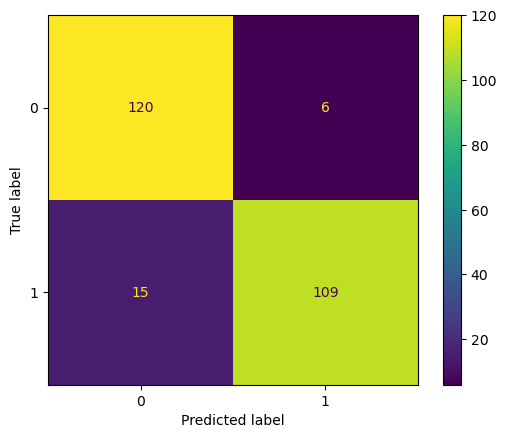

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
score = accuracy_score(y_test, y_pred)
print("Accuracy: ",score)
print("----------------------------------------------------------------------------")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------------------------")
cm = confusion_matrix(y_test,y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(values_format='')
plt.show()

In [27]:
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='auto')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    # Performance Metrics
    print(f"K : {i}")
    print(classification_report(y_test,y_pred))
    print('-'*50)

K : 1
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       126
           1       0.90      0.85      0.87       124

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

--------------------------------------------------
K : 2
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       126
           1       0.94      0.79      0.86       124

    accuracy                           0.87       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.87      0.87       250

--------------------------------------------------
K : 3
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       126
           1       0.92      0.88      0.90       124

    accuracy                           0.90       250
   macro

## KNN regressor

In [9]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=1000,
                     n_features=2,
                     noise=10, 
                     random_state=42)

In [10]:
## split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knn_reg = KNeighborsRegressor(n_neighbors=6, algorithm='auto')
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [13]:
y_pred = knn_reg.predict(X_test)

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error, accuracy_score
print('R Squared : ',r2_score(y_test,y_pred))
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE : ', mean_absolute_error(y_test,y_pred))

R Squared :  0.9144143924495542
MSE :  132.43178017077275
RMSE :  11.507900771677376
MAE :  9.161030372158939
